<a href="https://colab.research.google.com/github/JPVillamizarCastillo/TRAINING/blob/main/2_1_MVA%26POO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Muestreo de variables aleatoria aplicanco POO**

Una empresa del sector asegurador ha creado una base de datos de eventos de pérdidas asociado con la administración y la ejecución asociado con los procesos de la organización. De acuerdo con la base de datos, la empresa quiere llevar a cabo el proceso de muestreo de la distribución agregada de pérdidas mediante la utilización del método de Montecarlo, utilizando para ello diferentes niveles de confiabilidad.
* 99%
* 99,9%
* 99,99%

In [1]:
#Cargamos librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis #Saca el coeficiente de asimetria y Kurtosis

#from google.colab import drive
#drive.mount("/content/drive")

Mounted at /content/drive


In [10]:
nxl="/content/drive/MyDrive/ESTUDIO/UNI/OCTAVO SEMESTRE/Integración de datos y prospectiva/3. FallasTecnologicas.xlsx"
XDB=pd.read_excel(nxl, sheet_name=0)
XDB.head()

,Fechas,Eventos,Transaccion Promedio,Eventos-Fallo,Pérdida Promedio
0,Semana 1,80,14.8058,1,0.5374
1,Semana 2,105,56.4721,4,1.1978
2,Semana 3,70,9.9760,5,0.4269
3,Semana 4,105,18.2949,6,1.0814
4,Semana 5,130,23.4112,7,1.2105


In [ ]:
Xf=XDB.iloc[:,3] #Frecuencia
Xs=XDB.iloc[:,4] #Severidad
LDA=np.multiply(Xf,Xs)  #Producto entre la frecuencia y la severidad
dfLDA=pd.DataFrame(LDA) #Creamos un DF con los valores obtenidos.

#Muestreo de variable aleatoria

La media de los datos es: 10.039186


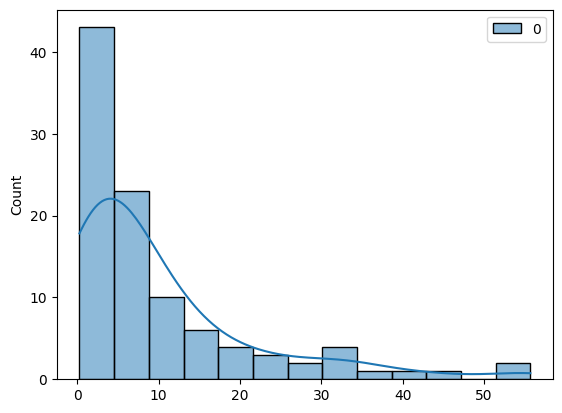

In [3]:
#Se hace el muestreo a 100 (99%)
LDA100=dfLDA.sample(n=100, replace=False)
media100=np.mean(LDA100)
print("La media de los datos es:", media100)

plt.figure()
sns.histplot(LDA100, kde=True)
plt.show()

**Creamos un función para la realización del muestreo**

In [4]:
def muestreo(ND, dfLDA):
  "ND: Numero de datos de muestreo Son los datos enviados al método"
  "Método: Forma de hacer las cosas"

  LDA=dfLDA.sample(n=ND, replace=True)
  media=np.mean(LDA)

  plt.figure()
  sns.histplot(LDA, kde=True)
  plt.show()

  return media, LDA
#Este metodo me entrega la medía y los datos muestreados

Procedemos con el muestreo

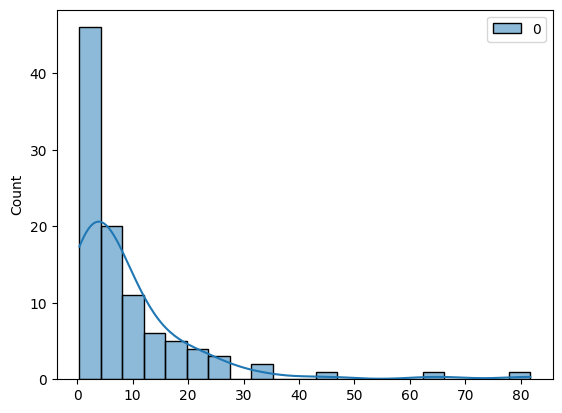

La media de los datos es: 9.056758


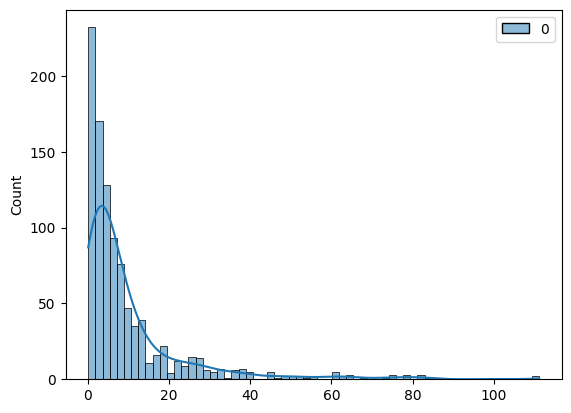

La media de los datos es: 9.9514473


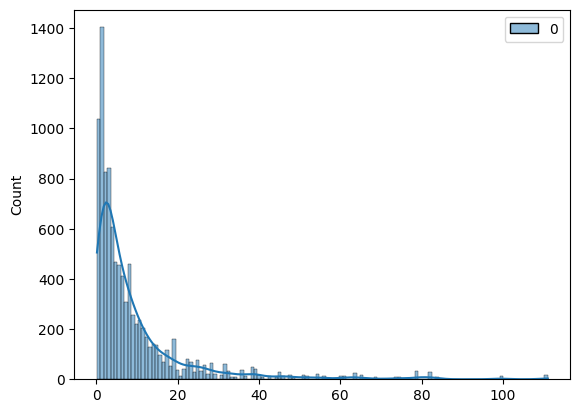

La media de los datos es: 9.58475169


In [5]:
#Muestreo a una confiabilidad del 99%
media99, LDAm99=muestreo(100, dfLDA)
print("La media de los datos es:", media99)

#Muestreo confiabilidad del 99,9%
media999, LDAm999=muestreo(1000, dfLDA)
print("La media de los datos es:", media999)

#Muestreo a una confiabilidad del 99,99%
media9999, LDAm999=muestreo(10000, dfLDA)
print("La media de los datos es:", media9999)

Procedemos a hacer todo dentro de una solo función que nos de los valores que necesitamos:

* Media
* Limite inferior
* Limite superior
* Kurtosis
* Coeficiente de asimetria

In [6]:
def muestreo(ND, dfLDA, p):
  "ND: Numero de datos de muestreo"
  "Son los datos enviados al método"
  "Método: Forma de hacer las cosas"

  LDA=dfLDA.sample(n=ND, replace=True)
  media=np.mean(LDA)
  LI=media+1.96*np.std(LDA)
  LS=media-1.96*np.std(LDA)

  plt.figure()
  sns.histplot(LDA, kde=True)
  plt.show()

  cas=skew(LDA)
  kur=kurtosis(LDA)

  ek2=(1.96**2)*p*(1-p)/ND

  return media, LDA, LI, LS, cas, kur, ek2

Creamos una función para definir que tipo de distribución se acopla mejor a nuestros datos.

In [7]:
def tipodist(cas,ck):

  if abs(cas)<0.5 and abs(ck)<0.5:
    tpdst=("Posible distribucion normal")
  elif cas>0 and ck>3:
    if ck>=8:
      tpdst=("Posible distribucion exponencial")
    elif ck>=6:
      tpdst=("Posible distribucion gamma")
    else:
      tpdst=("Posible distribucion Weibull")
  elif cas<0 and ck>3:
    tpdst=("Posible distribucion beta")
  elif ck<3:
    tpdst=("Posible distribucion uniforme")
  else:
    tpdst=("No se puede determinar la distribucion")
  return tpdst

Aplicamos ambas funciones para obtener los valores buscados e identificr el tipo de distribución que mejor se acopla a nuestros datos aleatorios.

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


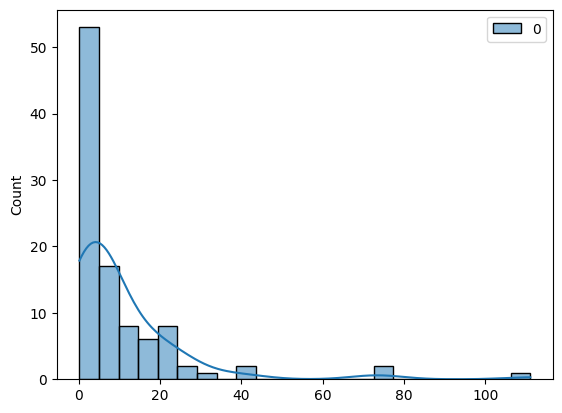

La media de los datos es: 10.615944999999996
El limite inferior de los datos es: 0    42.277595
dtype: float64
El limite superior de los datos es: 0   -21.045705
dtype: float64
El coeficiente de asimetria es [3.70808564]
El coeficiente de kurtosis es [16.8657421]
EL tipo de distribución es: Posible distribucion exponencial
El error es: 0.00038031840000000023


/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


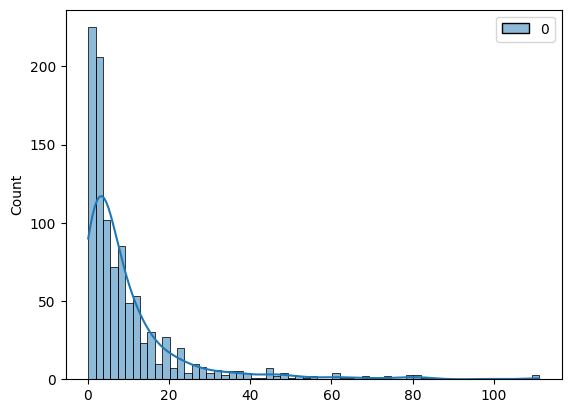

La media de los datos es: 9.8367892
El limite inferior de los datos es: 0    37.533302
dtype: float64
El limite superior de los datos es: 0   -17.859723
dtype: float64
El coeficiente de asimetria es [3.44026617]
El coeficiente de kurtosis es [15.14601742]
EL tipo de distribución es: Posible distribucion exponencial
El error es: 3.837758400000003e-06


/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


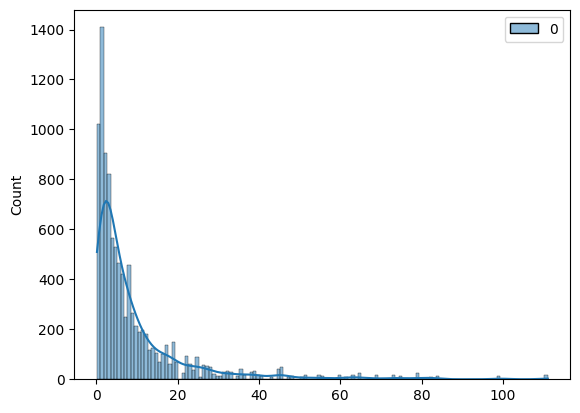

La media de los datos es: 9.5174075
EL limite inferior de los datos es 0    36.339749
dtype: float64
El limite superior de los datos es: 0   -17.859723
dtype: float64
El coeficiente de asimetria es [3.31242507]
El coeficiente de kurtosis es [14.02662533]
EL tipo de distribución es: Posible distribucion exponencial
El error es: 3.837758400000003e-06


In [8]:
#Muestreo a una confiabilidad del 99%
media99, LDAm99, LI99, LS99, cas99, kur99, ek299=muestreo(100, dfLDA, 0.99)
print("La media de los datos es:", media99)
print("El limite inferior de los datos es:", LI99)
print("El limite superior de los datos es:", LS99)
print("El coeficiente de asimetria es", cas99)
print("El coeficiente de kurtosis es", kur99)
print("EL tipo de distribución es:", tipodist(cas99, kur99))
print("El error es:", ek299)

#Muestreo confiabilidad del 99,9%
media999, LDAm999, LI999, LS999, cas999, kur999, ek2999=muestreo(1000, dfLDA,0.999)
print("La media de los datos es:", media999)
print("El limite inferior de los datos es:", LI999)
print("El limite superior de los datos es:", LS999)
print("El coeficiente de asimetria es", cas999)
print("El coeficiente de kurtosis es", kur999)
print("EL tipo de distribución es:", tipodist(cas999, kur999))
print("El error es:", ek2999)

#Muestreo a una confiabilidad del 99,99%
media9999, LDAm9999, LI9999, LS9999, cas9999, kur9999, ek9999=muestreo(10000, dfLDA,0.9999)
print("La media de los datos es:", media9999)
print("EL limite inferior de los datos es", LI9999)
print("El limite superior de los datos es:", LS999)
print("El coeficiente de asimetria es", cas9999)
print("El coeficiente de kurtosis es", kur9999)
print("EL tipo de distribución es:", tipodist(cas9999, kur9999))
print("El error es:", ek2999)

OBSERVACIÓN FINAL

Podemos observar que la variación entre las distribución de los datos según el grado de confiabilidad no varia mucho.
En todos los casos se puede observar cuna alta kurtosis, lo que sugiere una alta probabilidad de presencia de valores atipicos, en este contexto, serian casos de perdidas extermos que no estan cubiertos dentro de los rangos asegurados por la aseguradora.
El error de muestreo mejora a medida que aumnenta la confiabilidad, lo cual esta dentro de los estandares de normalidad.
